In [47]:
#NBA Player Stats (2024-25 Season) - Data Updated through 12/6/24

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
#warnings.filterwarnings('ignore')

# Load the data
df = pd.read_csv('database_24_25.csv')

# Display the first few rows of the CSV data
df.head()

#Intro - Dataset contains player per game statistics and is only through about a quarter of the seaason, 
#so I will be analyzing averages to provide consistent comparisons.
#Each team has played 20-23 games in the dataset out of an 82 game season.
#Question - what player and team statistics most likely lead to wins? 
## Which is more important to team performance - top player or team stats? 

,Player,Tm,Opp,Res,MP,FG,FGA,FG%,3P,3PA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,Data
0,Jayson Tatum,BOS,NYK,W,30.30,14,18,0.778,8,11,...,4,4,10,1,1,1,1,37,38.1,2024-10-22
1,Anthony Davis,LAL,MIN,W,37.58,11,23,0.478,1,3,...,13,16,4,1,3,1,1,36,34.0,2024-10-22
2,Derrick White,BOS,NYK,W,26.63,8,13,0.615,6,10,...,3,3,4,1,0,0,1,24,22.4,2024-10-22
3,Jrue Holiday,BOS,NYK,W,30.52,7,9,0.778,4,6,...,2,4,4,1,0,0,2,18,19.5,2024-10-22
4,Miles McBride,NYK,BOS,L,25.85,8,10,0.800,4,5,...,0,0,2,0,0,1,1,22,17.8,2024-10-22


In [48]:
import os
os.chdir('/Users/ryanoka/Downloads')
print(os.getcwd())



/Users/ryanoka/Downloads


In [93]:
# Create one row per team per game using 'Tm', 'Data', 'Res'
team_games = df[['Tm', 'Data', 'Res']].drop_duplicates()

# Count how many times each team had each result
TR = team_games.groupby(['Tm', 'Res']).size().unstack(fill_value=0).reset_index()

TR['Total'] = TR['W'] + TR['L']
TR['Win_Perc'] = TR['W'] / TR['Total']

TR_sorted = TR.sort_values(by='Win_Perc', ascending=False).reset_index(drop=True)  # Sorts in descending order

# Apply background gradient
TR_sorted = TR_sorted.style.background_gradient(subset=['Win_Perc'], cmap='coolwarm')

# Display the styled DataFrame
TR_sorted

#Since each team has an uneven number of games, the best way to rank performance is by there winning percentage up to this point in the season.
#The ranking shows Cle, Bos, and OKC are clearly the best 3 teams in their own tier.

Res,Tm,L,W,Total,Win_Perc
0,CLE,3,20,23,0.869565
1,BOS,4,18,22,0.818182
2,OKC,5,17,22,0.772727
3,ORL,8,16,24,0.666667
4,DAL,8,15,23,0.652174
5,MEM,8,15,23,0.652174
6,HOU,8,15,23,0.652174
7,NYK,8,14,22,0.636364
8,GSW,8,13,21,0.619048
9,LAC,10,14,24,0.583333


In [50]:
# Filter Team data
team_stats = df.groupby(['Tm', 'Data']).agg({
    'PTS': 'sum',
    'AST': 'sum',
    'TRB': 'sum',
    'STL': 'sum',
    'BLK': 'sum',
    'TOV': 'sum',
}).reset_index()

# Group by Result and calculate the mean for each stat
team_statsavg = team_stats.groupby(['Tm']).mean(numeric_only=True).reset_index()
#print(team_statsavg)

# Filter Team data
opponent_stats = df.groupby(['Opp', 'Data']).agg({
    'PTS': 'sum',
    'AST': 'sum',
    'TRB': 'sum',
    'STL': 'sum',
    'BLK': 'sum',
    'TOV': 'sum',
}).reset_index()

# Group by Result and calculate the mean for each stat
opponent_statsavg = opponent_stats.groupby(['Opp']).mean(numeric_only=True).reset_index()

# Rename a specific column
opponent_statsavg.rename(columns={'PTS': 'PTS Allowed'}, inplace=True)
#print(opponent_statsavg)

pts_combo = pd.merge(
    team_statsavg,
    opponent_statsavg,
    left_on='Tm',
    right_on='Opp',
    suffixes=('_team', '_opp')
)

pts_combo['PTS_Diff'] = pts_combo['PTS'] - pts_combo['PTS Allowed']

pts_wp = pd.merge(
    pts_combo,
    TR,
    left_on='Tm',
    right_on='Tm',
    suffixes=('_team', '_wp')
)

pts_wp

,Tm,PTS,AST_team,TRB_team,STL_team,BLK_team,TOV_team,Opp,PTS Allowed,AST_opp,TRB_opp,STL_opp,BLK_opp,TOV_opp,PTS_Diff,L,W,Total,Win_Perc
0,ATL,116.608696,29.739130,45.913043,10.217391,5.304348,15.565217,ATL,118.391304,26.695652,44.565217,9.608696,5.782609,16.000000,-1.782609,11,12,23,0.521739
1,BOS,120.500000,25.636364,43.863636,7.545455,5.545455,11.454545,BOS,110.227273,24.636364,43.318182,6.727273,3.863636,13.181818,10.272727,4,18,22,0.818182
2,BRK,109.956522,25.869565,38.347826,6.869565,3.826087,13.260870,BRK,113.652174,26.652174,43.043478,7.913043,6.521739,14.391304,-3.695652,13,10,23,0.434783
3,CHI,119.782609,29.217391,44.826087,7.043478,4.652174,15.086957,CHI,123.260870,29.565217,45.826087,8.608696,5.043478,11.304348,-3.478261,13,10,23,0.434783
4,CHO,107.045455,23.045455,45.545455,7.681818,5.000000,14.954545,CHO,112.590909,25.909091,42.863636,7.772727,5.318182,13.590909,-5.545455,16,6,22,0.272727
5,CLE,122.000000,28.217391,43.217391,9.130435,4.826087,12.565217,CLE,111.434783,25.565217,43.826087,7.565217,4.739130,14.956522,10.565217,3,20,23,0.869565
6,DAL,118.869565,25.869565,45.695652,8.217391,5.565217,13.478261,DAL,111.173913,26.304348,43.695652,7.956522,4.260870,13.608696,7.695652,8,15,23,0.652174
7,DEN,117.850000,30.100000,44.400000,8.700000,4.750000,13.600000,DEN,116.800000,30.000000,44.350000,8.500000,5.750000,14.150000,1.050000,9,11,20,0.550000
8,DET,110.125000,25.208333,45.458333,6.250000,5.541667,15.833333,DET,113.125000,24.875000,42.375000,9.916667,5.041667,12.791667,-3.000000,15,9,24,0.375000
9,GSW,115.285714,29.666667,49.190476,9.000000,5.285714,13.476190,GSW,109.428571,25.809524,46.047619,7.428571,6.142857,14.238095,5.857143,8,13,21,0.619048


In [51]:
wp_pts = pd.merge(
    TR,
    team_statsavg,
    left_on='Tm',
    right_on='Tm',
)

wp_pts_allowed = pd.merge(
    TR,
    opponent_statsavg,
    left_on='Tm',
    right_on='Opp',
    suffixes=('_team', '_opp')
)


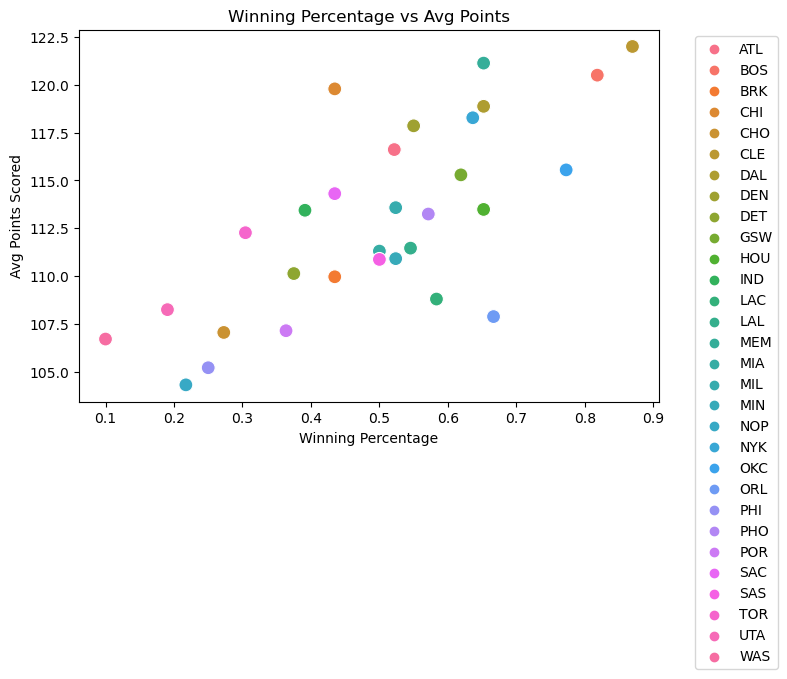

In [52]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=wp_pts, x='Win_Perc', y='PTS', hue='Tm', s=100)

plt.xlabel('Winning Percentage')
plt.ylabel('Avg Points Scored')
plt.title('Winning Percentage vs Avg Points')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#The three best teams average at least 115 points per game.

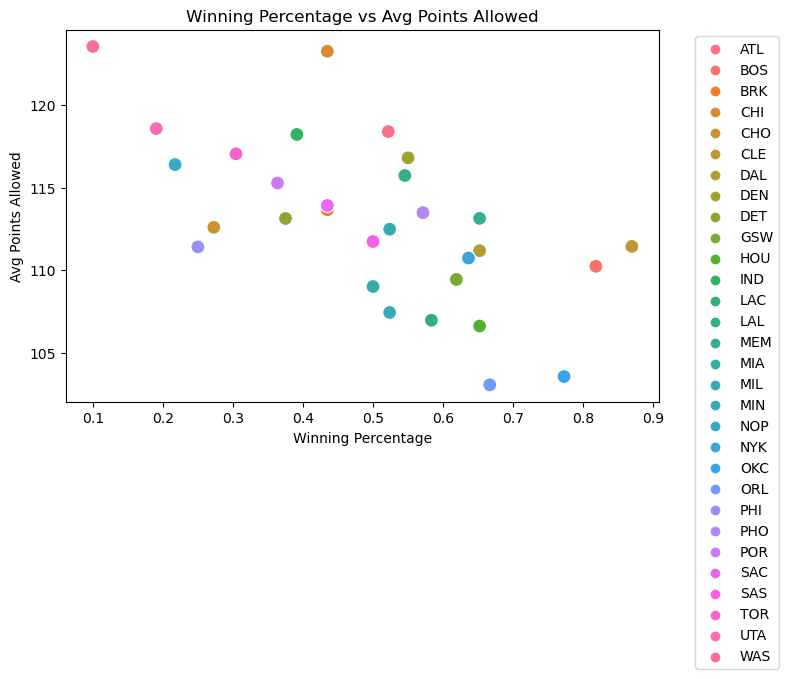

In [53]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=wp_pts_allowed, x='Win_Perc', y='PTS Allowed', hue='Tm', s=100)

plt.xlabel('Winning Percentage')
plt.ylabel('Avg Points Allowed')
plt.title('Winning Percentage vs Avg Points Allowed')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#The three best teams allow less than 112.5 points per game.

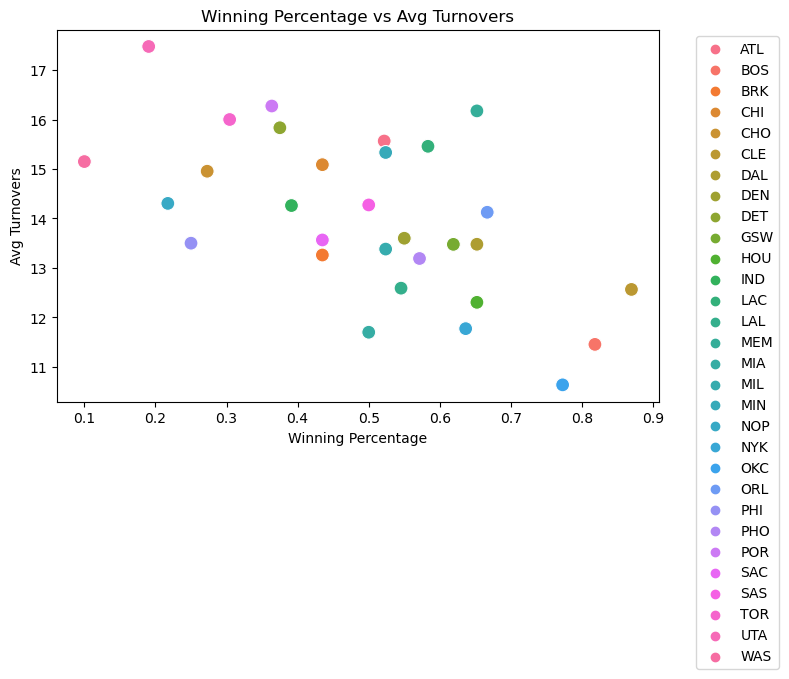

In [54]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=wp_pts, x='Win_Perc', y='TOV', hue='Tm', s=100)

plt.xlabel('Winning Percentage')
plt.ylabel('Avg Turnovers')
plt.title('Winning Percentage vs Avg Turnovers')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#The three best teams average less than 13 turnovers a game.

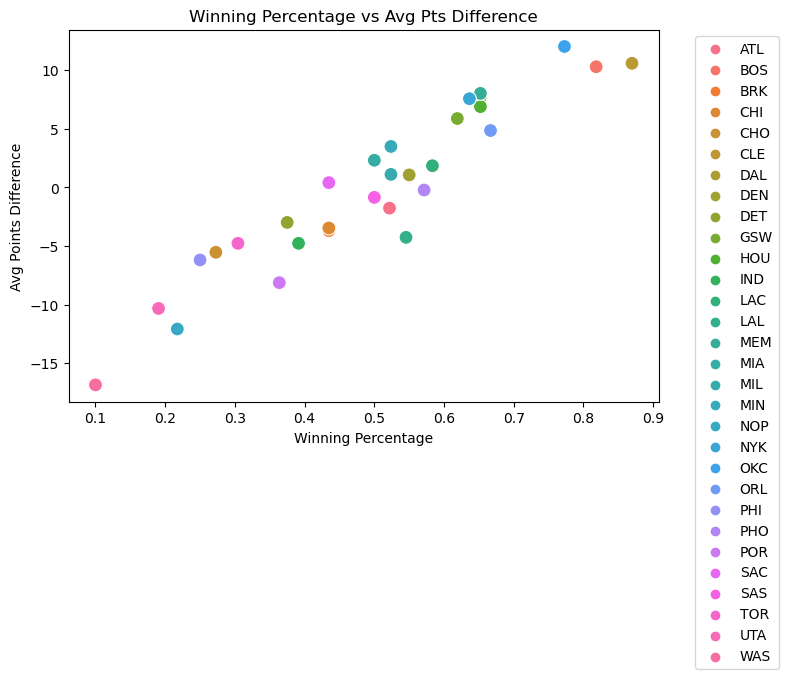

In [55]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pts_wp, x='Win_Perc', y='PTS_Diff', hue='Tm', s=100)

plt.xlabel('Winning Percentage')
plt.ylabel('Avg Points Difference')
plt.title('Winning Percentage vs Avg Pts Difference')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#The three best teams have around a minimum of +10 points differential.

In [56]:
# Filter Team data
opponent = df.groupby(['Opp', 'Data']).agg({
    'PTS': 'sum',
    'AST': 'sum',
    'TRB': 'sum',
    'STL': 'sum',
    'BLK': 'sum',
    'TOV': 'sum',
    'Res': 'first'  # or use 'max'/'min' if all are the same
}).reset_index()

# Swap results: W becomes L, L becomes W
opponent['Res'] = opponent['Res'].replace({'W': 'L', 'L': 'W'})
print(opponent)


     Opp        Data  PTS  AST  TRB  STL  BLK  TOV Res
0    ATL  2024-10-23  116   21   43    8    6   17   W
1    ATL  2024-10-25  120   22   53    7    4   17   W
2    ATL  2024-10-27  128   26   45   13   12   10   L
3    ATL  2024-10-28  121   24   43    7    3   18   L
4    ATL  2024-10-30  133   32   37   10    5   14   L
..   ...         ...  ...  ...  ...  ...  ...  ...  ..
659  WAS  2024-11-26  127   29   50    6    4   10   L
660  WAS  2024-11-27  121   27   47   18    4   13   L
661  WAS  2024-11-30  124   31   38    5    6   11   L
662  WAS  2024-12-03  118   31   45   11    4   11   L
663  WAS  2024-12-05  137   27   58    8   12   15   L

[664 rows x 9 columns]


     Opp        Data  PTS  AST  TRB  STL  BLK  TOV Res PTS_Group
0    ATL  2024-10-23  116   21   43    8    6   17   W   115-125
1    ATL  2024-10-25  120   22   53    7    4   17   W   115-125
2    ATL  2024-10-27  128   26   45   13   12   10   L   125-135
3    ATL  2024-10-28  121   24   43    7    3   18   L   115-125
4    ATL  2024-10-30  133   32   37   10    5   14   L   125-135
..   ...         ...  ...  ...  ...  ...  ...  ...  ..       ...
659  WAS  2024-11-26  127   29   50    6    4   10   L   125-135
660  WAS  2024-11-27  121   27   47   18    4   13   L   115-125
661  WAS  2024-11-30  124   31   38    5    6   11   L   115-125
662  WAS  2024-12-03  118   31   45   11    4   11   L   115-125
663  WAS  2024-12-05  137   27   58    8   12   15   L   135-145

[664 rows x 10 columns]
  PTS_Group  total_games  total_wins  win_percentage
0     <=105          177         146       82.485876
1   105-115          176          95       53.977273
2   115-125          192          74

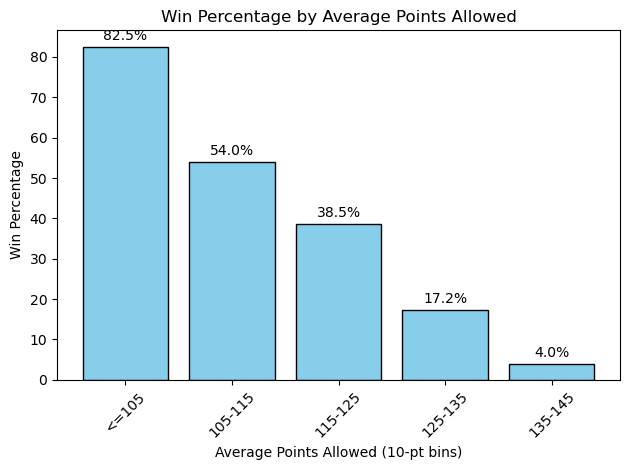

In [57]:
# Create custom bins: start with -inf to 100, then regular 5-point bins
min_bin = -np.inf
step = 10
max_bin = int(opponent['PTS'].max())
regular_bins = list(range(105, max_bin + step, step))

# Combine bins
bins = [min_bin] + regular_bins

# Create labels if needed
labels = ["<=105"] + [f"{i}-{i+step}" for i in regular_bins[:-1]]

# Apply binning
opponent['PTS_Group'] = pd.cut(opponent['PTS'], bins=bins, labels=labels, right=False)

# Check result
print(opponent)

# Group by PTS_Group and calculate the total wins and total games
group_wp = opponent.groupby('PTS_Group').agg(
    total_games=('Res', 'count'),  # Count total games in each group
    total_wins=('Res', lambda x: (x == 'W').sum())  # Count total wins in each group
).reset_index()

# Calculate the win percentage for each PTS_Group bin
group_wp['win_percentage'] = group_wp['total_wins'] / group_wp['total_games'] * 100

# Print the result to see the win percentage for each bin
print(group_wp)

# # Step 5 (Optional): Turn into a DataFrame
# result_df = group_percentages.reset_index()
# result_df.columns = ['PTS_Group', 'Percentage_of_Players']
# print(result_df)

# Step 6: Plot it
plt.bar(group_wp['PTS_Group'].astype(str), group_wp['win_percentage'], color='skyblue', edgecolor='black')

# Add data labels on top of each bar
for i, value in enumerate(group_wp['win_percentage']):
    plt.text(i, value + 1, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)


plt.xticks(rotation=45)
plt.ylabel('Win Percentage')
plt.xlabel('Average Points Allowed (10-pt bins)')
plt.title('Win Percentage by Average Points Allowed')
plt.tight_layout()
plt.show()

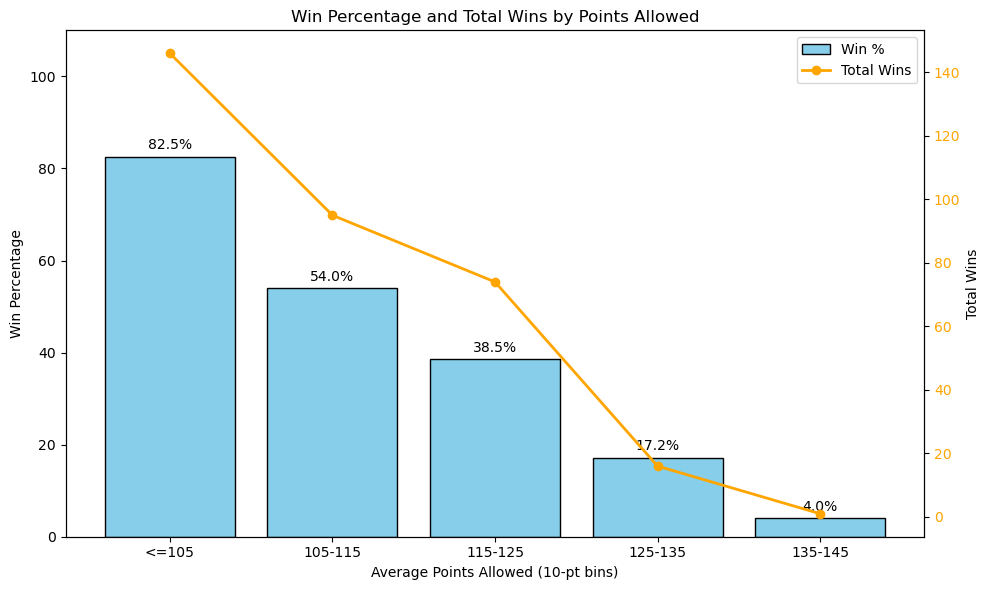

In [58]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for win percentage
bars = ax1.bar(group_wp['PTS_Group'].astype(str), group_wp['win_percentage'], 
               color='skyblue', edgecolor='black', label='Win %')

# Add data labels on top of each bar
for i, value in enumerate(group_wp['win_percentage']):
    ax1.text(i, value + 1, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)

# Primary y-axis setup
ax1.set_ylabel('Win Percentage')
ax1.set_xlabel('Average Points Allowed (10-pt bins)')
ax1.set_title('Win Percentage and Total Wins by Points Allowed')
ax1.tick_params(axis='y')
ax1.set_ylim(0, 110)

# Secondary y-axis for total wins
ax2 = ax1.twinx()
ax2.plot(group_wp['PTS_Group'].astype(str), group_wp['total_wins'], 
         color='orange', marker='o', linewidth=2, label='Total Wins')
ax2.set_ylabel('Total Wins')
ax2.tick_params(axis='y', labelcolor='orange')

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right')

# Rotate x-ticks and tighten layout
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#If you allow 105 poiints or less, a team's odds of winning are almost 30 percentage points better than the next bucket.
#The total number of wins shows this is not just a small anomaly in the data.  

In [59]:
# Filter Team data
team_pts = df.groupby(['Tm', 'Data']).agg({
    'PTS': 'sum',
    'AST': 'sum',
    'TRB': 'sum',
    'STL': 'sum',
    'BLK': 'sum',
    'TOV': 'sum',
    'Res': 'first'  # or use 'max'/'min' if all are the same
}).reset_index()

# Define the key bin points
min_pts = 100
max_pts = 120
step = 10

# Create regular bins within the desired range
middle_bins = list(range(min_pts, max_pts + step, step))

# Combine full bin edges with -inf and inf at both ends
bins = [-np.inf] + middle_bins + [np.inf]

# Create labels for those bins
labels = [f"<{min_pts}"] + [f"{i}-{i+step}" for i in middle_bins[:-1]] + [f">={max_pts}"]

# Apply to your scoring column (assuming 'PTS' is team points scored, not opponent's)
team_pts['PTS_Group'] = pd.cut(team_pts['PTS'], bins=bins, labels=labels, right=False)

team_pts

,Tm,Data,PTS,AST,TRB,STL,BLK,TOV,Res,PTS_Group
0,ATL,2024-10-23,120,25,45,12,9,16,W,>=120
1,ATL,2024-10-25,125,25,39,11,9,13,W,>=120
2,ATL,2024-10-27,104,24,49,7,4,19,L,100-110
3,ATL,2024-10-28,119,32,39,12,7,16,L,110-120
4,ATL,2024-10-30,120,28,41,10,2,15,L,>=120
...,...,...,...,...,...,...,...,...,...,...
659,WAS,2024-11-26,108,27,43,7,3,12,L,100-110
660,WAS,2024-11-27,96,21,40,9,4,20,L,<100
661,WAS,2024-11-30,114,24,41,7,3,12,L,110-120
662,WAS,2024-12-03,87,18,52,4,8,20,L,<100


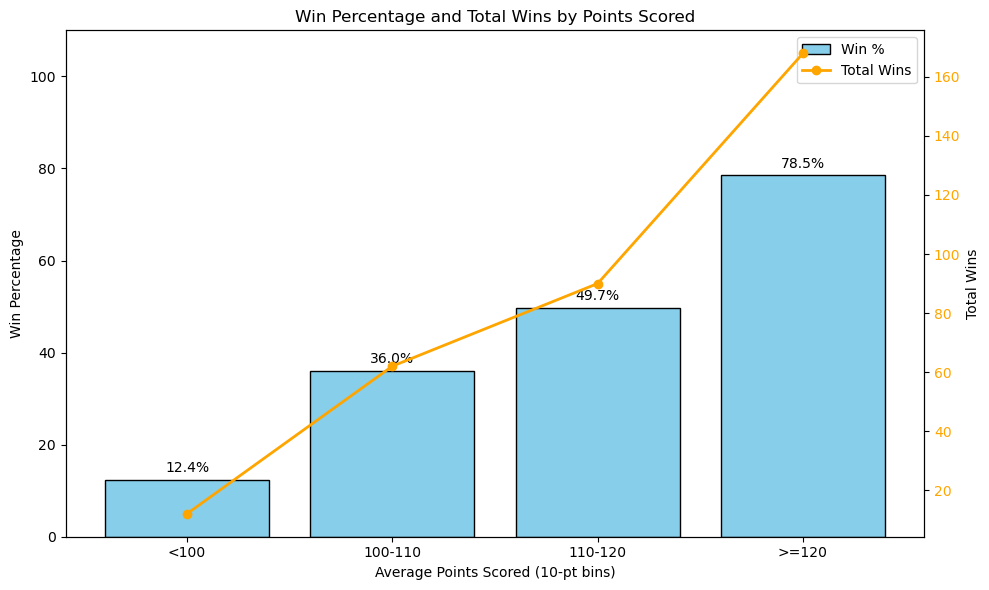

In [60]:
# Group by PTS_Group and calculate the total wins and total games
team_wp = team_pts.groupby('PTS_Group').agg(
    total_games=('Res', 'count'),  # Count total games in each group
    total_wins=('Res', lambda x: (x == 'W').sum())  # Count total wins in each group
).reset_index()

# Calculate the win percentage for each PTS_Group bin
team_wp['win_percentage'] = team_wp['total_wins'] / team_wp['total_games'] * 100

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for win percentage
bars = ax1.bar(team_wp['PTS_Group'].astype(str), team_wp['win_percentage'], 
               color='skyblue', edgecolor='black', label='Win %')

# Add data labels on top of each bar
for i, value in enumerate(team_wp['win_percentage']):
    ax1.text(i, value + 1, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)

# Primary y-axis setup
ax1.set_ylabel('Win Percentage')
ax1.set_xlabel('Average Points Scored (10-pt bins)')
ax1.set_title('Win Percentage and Total Wins by Points Scored')
ax1.tick_params(axis='y')
ax1.set_ylim(0, 110)

# Secondary y-axis for total wins
ax2 = ax1.twinx()
ax2.plot(team_wp['PTS_Group'].astype(str), team_wp['total_wins'], 
         color='orange', marker='o', linewidth=2, label='Total Wins')
ax2.set_ylabel('Total Wins')
ax2.tick_params(axis='y', labelcolor='orange')

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right')

# Rotate x-ticks and tighten layout
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#If you score 120 points or more, a team's odds of winning are almost 30 percentage points better than the next bucket.


In [61]:
# Define the key bin points
min_bin = 10
max_bin = 20
step = 5

# Create regular bins within the desired range
middle_bins = list(range(min_bin, max_bin + step, step))

# Combine full bin edges with -inf and inf at both ends
bins = [-np.inf] + middle_bins + [np.inf]

# Create labels for those bins
labels = [f"<{min_bin}"] + [f"{i}-{i+step}" for i in middle_bins[:-1]] + [f">={max_bin}"]

# Apply to your TOV column
team_pts['TOV_Group'] = pd.cut(team_pts['TOV'], bins=bins, labels=labels, right=False)

team_pts

,Tm,Data,PTS,AST,TRB,STL,BLK,TOV,Res,PTS_Group,TOV_Group
0,ATL,2024-10-23,120,25,45,12,9,16,W,>=120,15-20
1,ATL,2024-10-25,125,25,39,11,9,13,W,>=120,10-15
2,ATL,2024-10-27,104,24,49,7,4,19,L,100-110,15-20
3,ATL,2024-10-28,119,32,39,12,7,16,L,110-120,15-20
4,ATL,2024-10-30,120,28,41,10,2,15,L,>=120,15-20
...,...,...,...,...,...,...,...,...,...,...,...
659,WAS,2024-11-26,108,27,43,7,3,12,L,100-110,10-15
660,WAS,2024-11-27,96,21,40,9,4,20,L,<100,>=20
661,WAS,2024-11-30,114,24,41,7,3,12,L,110-120,10-15
662,WAS,2024-12-03,87,18,52,4,8,20,L,<100,>=20


  TOV_Group  total_games  total_wins  win_percentage
0       <10           78          45       57.692308
1     10-15          306         162       52.941176
2     15-20          215         108       50.232558
3      >=20           65          17       26.153846


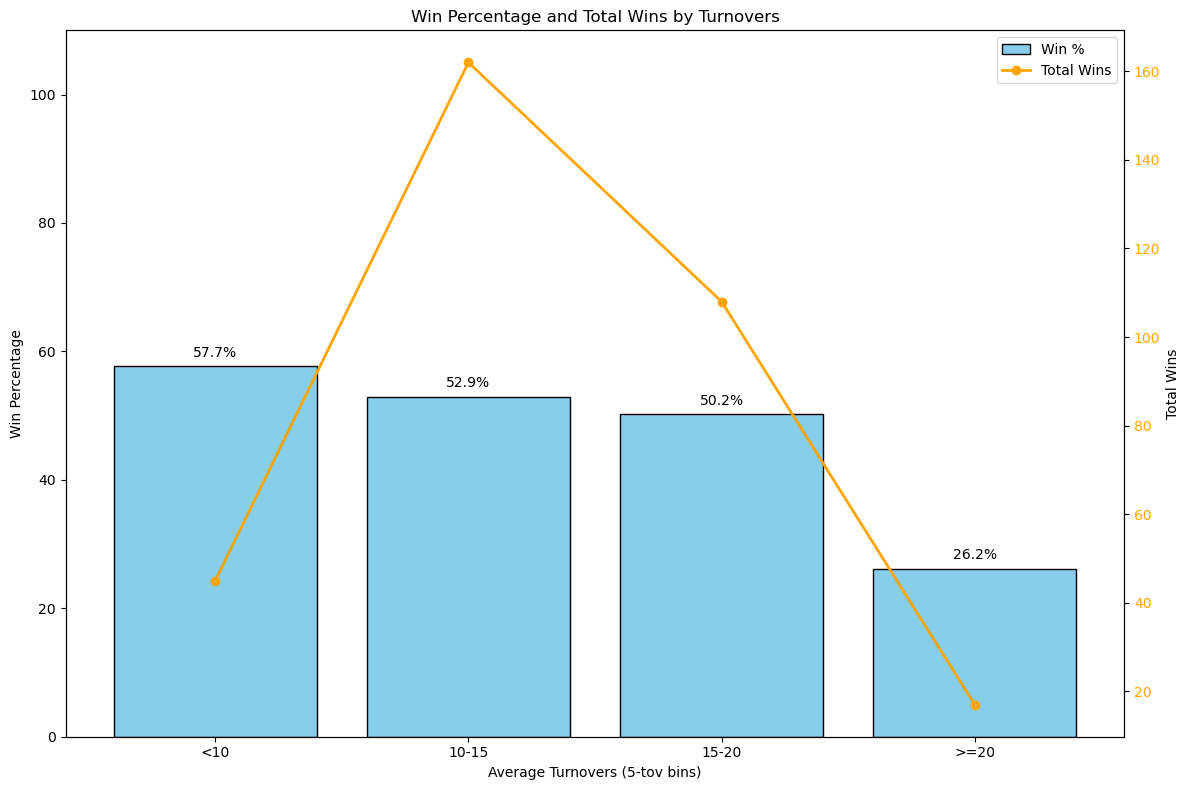

In [62]:
# Group by TOV_Group and calculate the total wins and total games
tov_wp = team_pts.groupby('TOV_Group').agg(
    total_games=('Res', 'count'),  # Count total games in each group
    total_wins=('Res', lambda x: (x == 'W').sum())  # Count total wins in each group
).reset_index()

# Calculate the win percentage for each PTS_Group bin
tov_wp['win_percentage'] = tov_wp['total_wins'] / tov_wp['total_games'] * 100
print(tov_wp)

fig, ax1 = plt.subplots(figsize=(12, 8))

# Bar chart for win percentage
bars = ax1.bar(tov_wp['TOV_Group'].astype(str), tov_wp['win_percentage'], 
               color='skyblue', edgecolor='black', label='Win %')

# Add data labels on top of each bar
for i, value in enumerate(tov_wp['win_percentage']):
    ax1.text(i, value + 1, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)

# Primary y-axis setup
ax1.set_ylabel('Win Percentage')
ax1.set_xlabel('Average Turnovers (5-tov bins)')
ax1.set_title('Win Percentage and Total Wins by Turnovers')
ax1.tick_params(axis='y')
ax1.set_ylim(0, 110)

# Secondary y-axis for total wins
ax2 = ax1.twinx()
ax2.plot(tov_wp['TOV_Group'].astype(str), tov_wp['total_wins'], 
         color='orange', marker='o', linewidth=2, label='Total Wins')
ax2.set_ylabel('Total Wins')
ax2.tick_params(axis='y', labelcolor='orange')

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right')

# Rotate x-ticks and tighten layout
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Intrestingly, the chances of winning are similar until you have 20 or more turnovers. 

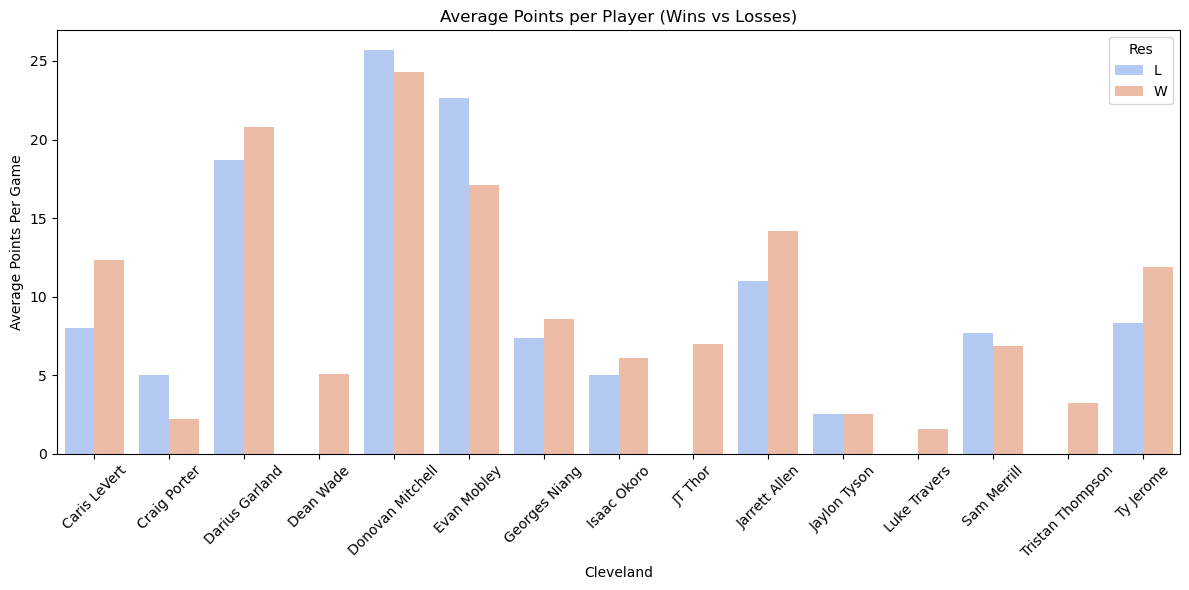

In [63]:
# Step 1: Group by Team, Player, and Game to aggregate raw stats
team_player = df.groupby(['Tm', 'Player', 'Data']).agg({
    'PTS': 'sum',
    'AST': 'sum',
    'TRB': 'sum',
    'STL': 'sum',
    'BLK': 'sum',
    'TOV': 'sum',
    'Res': 'first'  # carry over game result
}).reset_index()

# Step 2: Group by Team, Player, and Result to get per-result averages
team_playeravg = team_player.groupby(['Tm', 'Player', 'Res']).mean(numeric_only=True).reset_index()

cle = team_playeravg[team_playeravg['Tm'] == 'CLE']

#  Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=cle, x='Player', y='PTS', hue='Res', palette='coolwarm')

# Formatting
plt.title("Average Points per Player (Wins vs Losses)")
plt.xlabel("Cleveland")
plt.ylabel("Average Points Per Game")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#The highest scoring players aren't as impactful in wins as the other role players. It truly is a team sport.

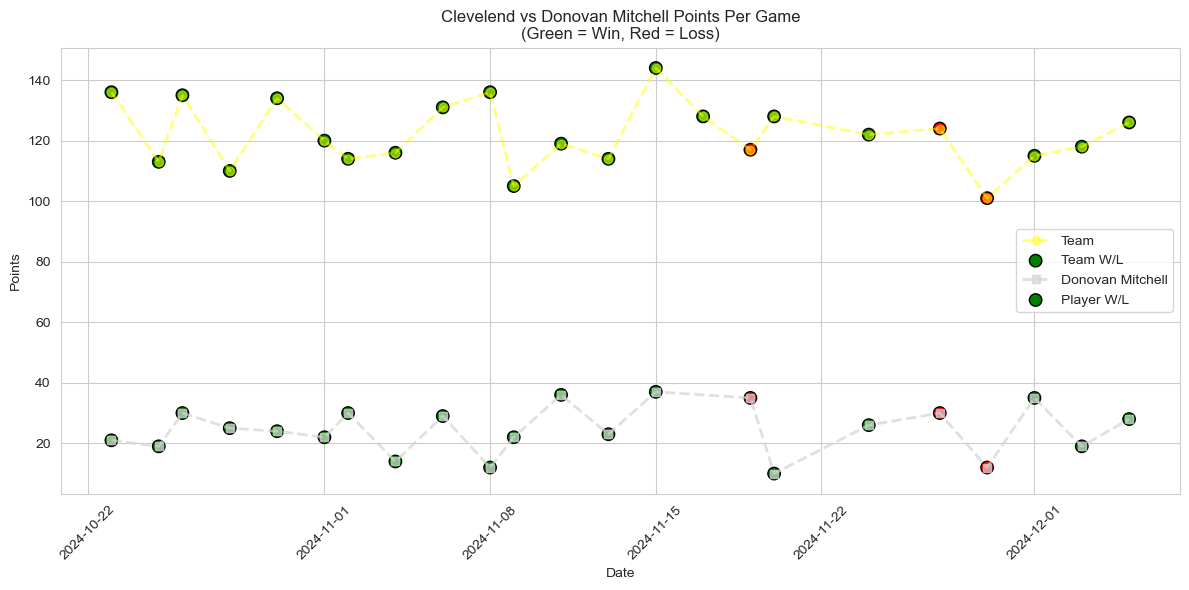

In [64]:
# Step 1: Group by Team, Player, and Game to aggregate raw stats
team_player = df.groupby(['Tm', 'Player', 'Data']).agg({
    'PTS': 'sum',
    'AST': 'sum',
    'TRB': 'sum',
    'STL': 'sum',
    'BLK': 'sum',
    'TOV': 'sum',
    'Res': 'first'  # carry over game result
}).reset_index()
#print(team_player)

team_total = df.groupby(['Tm', 'Data']).agg({
    'PTS': 'sum',
    'AST': 'sum',
    'TRB': 'sum',
    'STL': 'sum',
    'BLK': 'sum',
    'TOV': 'sum',
    'Res': 'first'  # carry over game result
}).reset_index()
#print(team_total)

team_cle = team_total[team_total['Tm'] == 'CLE'].copy()
mitchell = team_player[team_player['Player'] == 'Donovan Mitchell'].copy()

#try this for allowed
team_cle['Data'] = pd.to_datetime(team_cle['Data'])
mitchell['Data'] = pd.to_datetime(mitchell['Data'])

# Sort data by Team and then Date
team_cle = team_cle.sort_values(by=['Tm', 'Data'])
mitchell = mitchell.sort_values(by=['Player', 'Data'])

# Set plot style
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# --- TEAM LINE ---
plt.plot(
    team_cle['Data'], team_cle['PTS'],
    label='Team', color='yellow', marker='o', linestyle='--', linewidth=2, alpha=0.5
)
plt.scatter(
    team_cle['Data'], team_cle['PTS'],
    c=team_cle['Res'].map({'W': 'green', 'L': 'red'}),
    edgecolors='black', s=80, label='Team W/L'
)

# --- PLAYER LINE ---
plt.plot(
    mitchell['Data'], mitchell['PTS'],
    label=mitchell['Player'].iloc[0], color='lightgrey', marker='s', linestyle='--', linewidth=2, alpha=0.7
)
plt.scatter(
   mitchell['Data'], mitchell['PTS'],
    c=mitchell['Res'].map({'W': 'green', 'L': 'red'}),
    edgecolors='black', s=80, label='Player W/L'
)

# Labels and title
plt.xlabel("Date")
plt.ylabel("Points")
plt.title("Clevelend vs Donovan Mitchell Points Per Game\n(Green = Win, Red = Loss)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

#Cleveland still can lose even in Donovan Mitchell's higher scoring games and win in his lower scoring games, 
#which means his scoring performance is less correlated to the result.

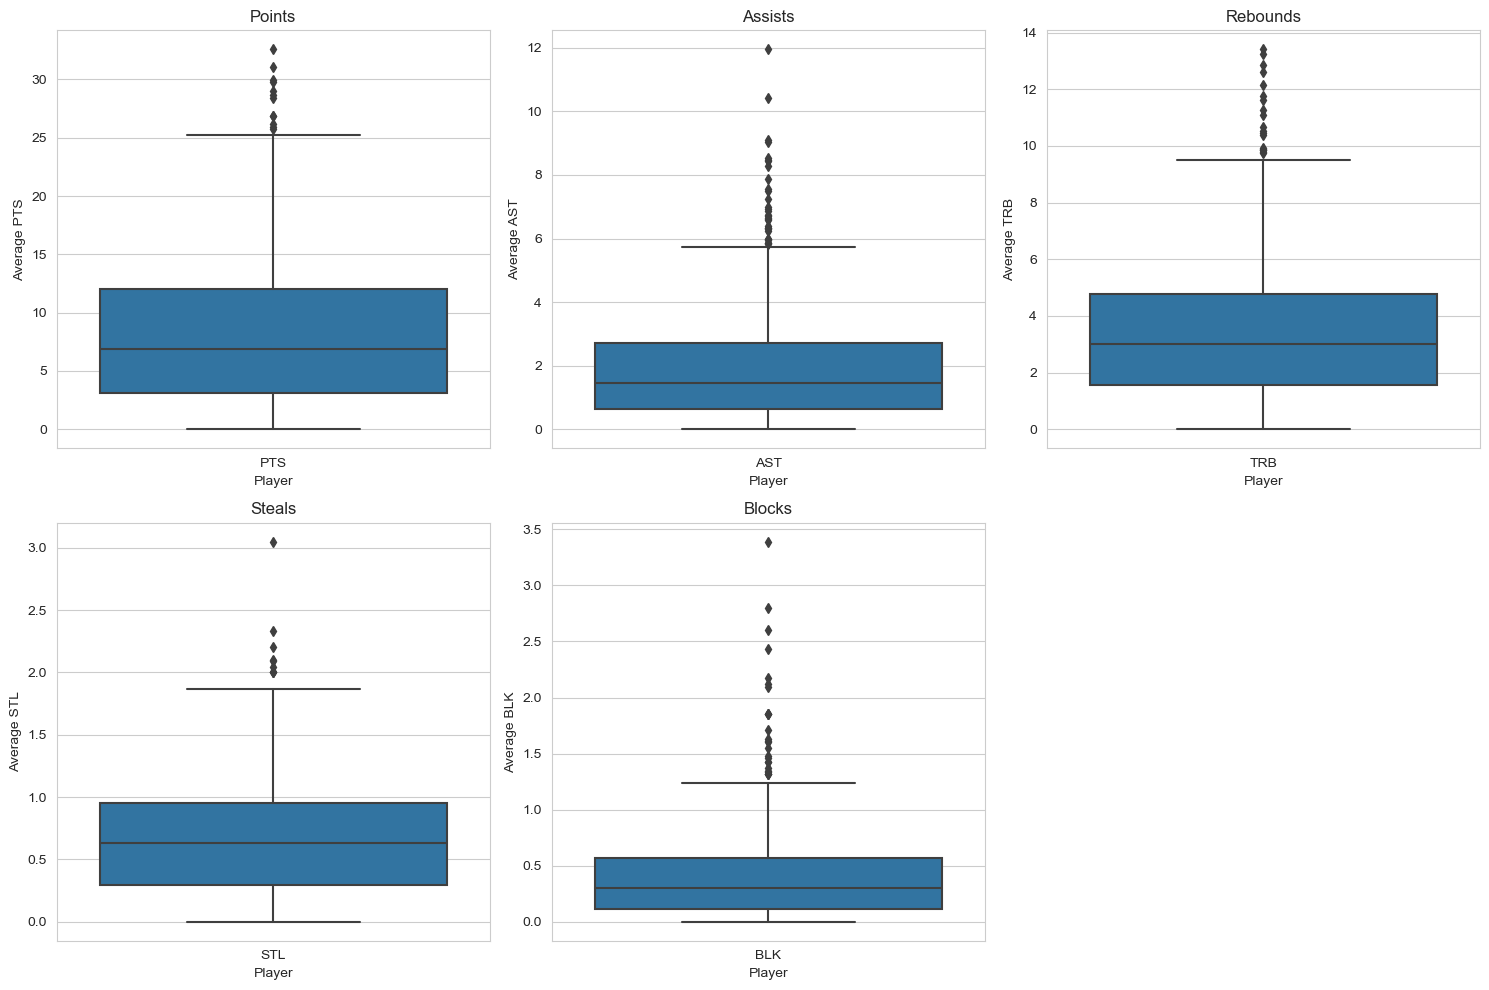

In [65]:
# Group by player and calculate the mean of all numeric stats
avg_player_stats = df.groupby('Player')[['PTS', 'AST', 'TRB', 'STL', 'BLK']].mean().reset_index()

# Convert from wide format to long format for Seaborn boxplot
avg_player_stats_long = avg_player_stats.melt(id_vars='Player', 
                                              value_vars=['PTS', 'AST', 'TRB', 'STL', 'BLK'], 
                                              var_name='Stat', 
                                              value_name='Average')

# Create a figure with subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Create the boxplots manually for each stat
sns.boxplot(x='Stat', y='Average', data=avg_player_stats_long[avg_player_stats_long['Stat'] == 'PTS'], ax=axes[0,0])
axes[0,0].set_title('Points')
axes[0,0].set_xlabel('Player')
axes[0,0].set_ylabel('Average PTS')

sns.boxplot(x='Stat', y='Average', data=avg_player_stats_long[avg_player_stats_long['Stat'] == 'AST'], ax=axes[0,1])
axes[0,1].set_title('Assists')
axes[0,1].set_xlabel('Player')
axes[0,1].set_ylabel('Average AST')

sns.boxplot(x='Stat', y='Average', data=avg_player_stats_long[avg_player_stats_long['Stat'] == 'TRB'], ax=axes[0,2])
axes[0,2].set_title('Rebounds')
axes[0,2].set_xlabel('Player')
axes[0,2].set_ylabel('Average TRB')

sns.boxplot(x='Stat', y='Average', data=avg_player_stats_long[avg_player_stats_long['Stat'] == 'STL'], ax=axes[1,0])
axes[1,0].set_title('Steals')
axes[1,0].set_xlabel('Player')
axes[1,0].set_ylabel('Average STL')

sns.boxplot(x='Stat', y='Average', data=avg_player_stats_long[avg_player_stats_long['Stat'] == 'BLK'], ax=axes[1,1])
axes[1,1].set_title('Blocks')
axes[1,1].set_xlabel('Player')
axes[1,1].set_ylabel('Average BLK')

# Remove the unused subplot at axes[1, 2]
axes[1, 2].axis('off')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

#There are elite outlier players in every statistical category, but how important are they to wins?


In [66]:

# Create one row per player per game using 'Player', 'Data', 'Res'
player_games = df[['Player', 'Data', 'Res']].drop_duplicates()

# Count how many times each player had each result
PR = player_games.groupby(['Player', 'Res']).size().unstack(fill_value=0).reset_index()

PR['Total'] = PR['W'] + PR['L']
PR['Win_Perc'] = PR['W'] / PR['Total']
print(PR)

# Filter Player data
player_stats = df.groupby(['Player', 'Data']).agg({
    'PTS': 'sum',
    'AST': 'sum',
    'TRB': 'sum',
    'STL': 'sum',
    'BLK': 'sum',
    'TOV': 'sum',
}).reset_index()

# Group by Result and calculate the mean for each stat
player_statsavg = player_stats.groupby(['Player']).mean(numeric_only=True).reset_index()
print(player_statsavg)

wp_player = pd.merge(
    PR,
    player_statsavg,
    left_on='Player',
    right_on='Player',
)

print(wp_player)

Res           Player   L   W  Total  Win_Perc
0         A.J. Green   9  11     20  0.550000
1         AJ Johnson   2   3      5  0.600000
2       Aaron Gordon   5   5     10  0.500000
3      Aaron Holiday   5   8     13  0.615385
4      Aaron Nesmith   4   2      6  0.333333
..               ...  ..  ..    ...       ...
491        Zach Edey   6   8     14  0.571429
492      Zach LaVine  10  10     20  0.500000
493       Zeke Nnaji   5   9     14  0.642857
494  Ziaire Williams  12   9     21  0.428571
495  Zion Williamson   4   2      6  0.333333

[496 rows x 5 columns]
              Player        PTS       AST       TRB       STL       BLK  \
0         A.J. Green   8.200000  1.000000  2.150000  0.600000  0.050000   
1         AJ Johnson   1.400000  0.200000  0.400000  0.000000  0.000000   
2       Aaron Gordon  15.100000  3.300000  6.400000  0.600000  0.200000   
3      Aaron Holiday   3.923077  1.153846  1.000000  0.076923  0.076923   
4      Aaron Nesmith   9.166667  1.000000  4.0000

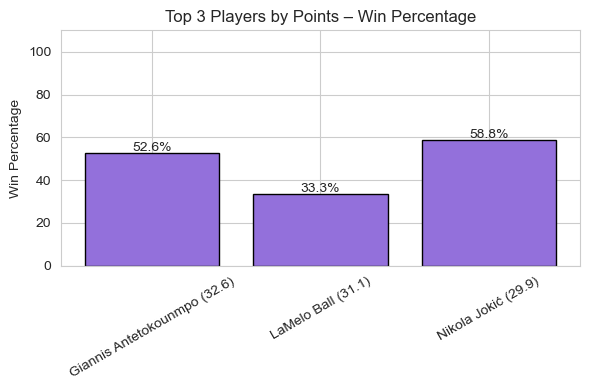

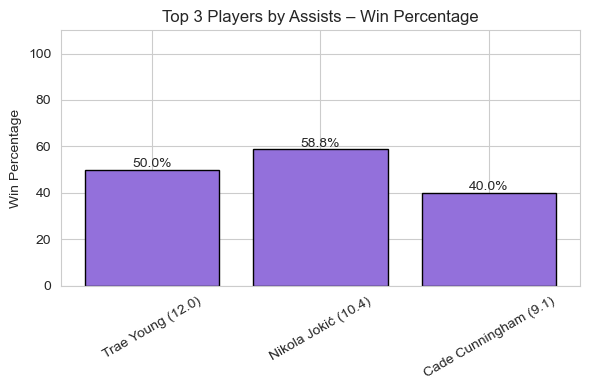

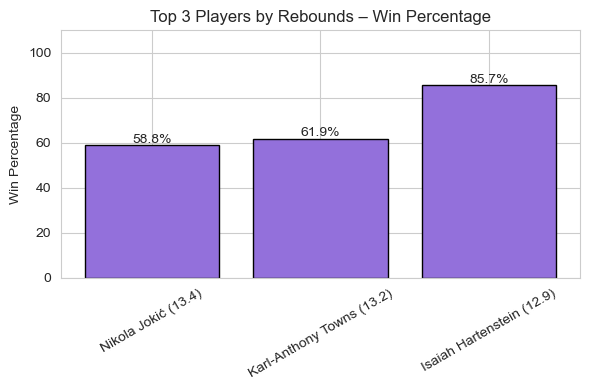

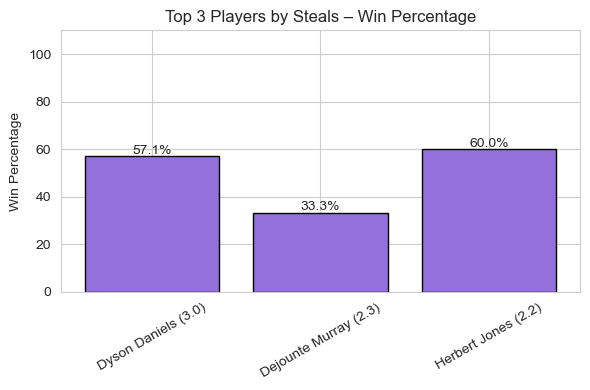

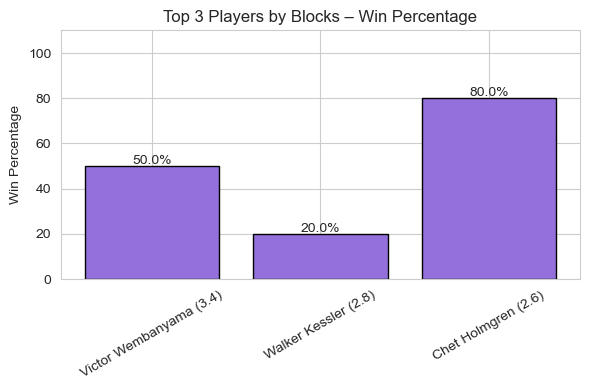

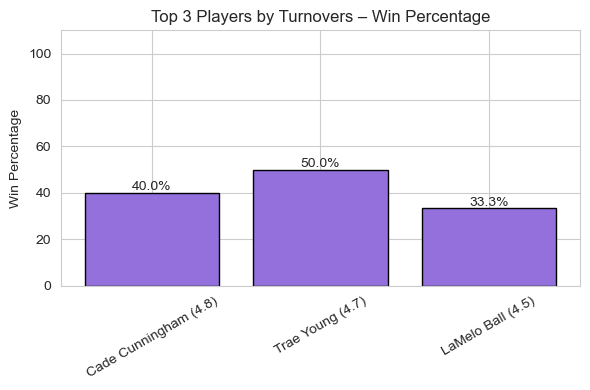

In [67]:
# Define your stat columns again
stats_cols = ['PTS', 'AST', 'TRB', 'STL', 'BLK', 'TOV']
top3_dict = {}

# Step 1: Get top 3 players by each category
for col in stats_cols:
    top3 = wp_player.sort_values(by=col, ascending=False).head(3).copy()
    # Format player label with stat value
    top3['Label'] = top3.apply(lambda row: f"{row['Player']} ({row[col]:.1f})", axis=1)
    top3_dict[col] = top3

stat_names = {
    'PTS': 'Points',
    'AST': 'Assists',
    'TRB': 'Rebounds',
    'STL': 'Steals',
    'BLK': 'Blocks',
    'TOV': 'Turnovers'
}

# Step 2: Create bar plots
for col in stats_cols:
    data = top3_dict[col]
    plt.figure(figsize=(6, 4))
    bars = plt.bar(data['Label'], data['Win_Perc'] * 100, color='mediumpurple', edgecolor='black')

    # Add percentage labels
    for i, wp in enumerate(data['Win_Perc'] * 100):
        plt.text(i, wp + 1, f'{wp:.1f}%', ha='center', fontsize=10)

    plt.title(f"Top 3 Players by {stat_names[col]} – Win Percentage")
    plt.ylabel("Win Percentage")
    plt.ylim(0, 110)
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

#Having a top average stat leader, doesn't necessarily lead to winning results. 

In [95]:
import os
os.getcwd()

'/Users/ryanoka/Downloads'